# Lecture 14: July 26th, 2023

__Today:__
* A few end-of-session announcements
* More image processing! 

__Announcements:__
* Summer Session I is almost over! Hard to believe, huh? The next week or so will be a little hectic with deadlines, so it's important to stay organized:
    * Final creative homework due Wednesday, August 2nd at 11:59pm PDT. This is a hard deadline, so try to get it in as early as possible.
    * Python Homework #4 due Wednesday, August 2nd at 11:59pm PDT. If you will be needing an extension on this assignment, put in your token request as soon as possible.
    * More outcome quizzes will be released later today. I will set the deadline as next Wednesday. Instead of having new outcome quizzes released next Monday, how does it sound if I increase the number of attempts this week?
    * Deadline for EO/GO revision will also be Wednesday, August 2nd at 11:59pm PDT.
* Yasmeen will hold one last "lecture" on Monday, July 31st during our regular lecture time. I will not be presenting any new material, but feel free to use the time to work on assignments, ask questions, etc. 

## Setting colors

In [3]:
from PIL import Image
import numpy as np

Notice, `import Image` is sensitive to caps. If I try `import image`, it will throw an error.

In [4]:
img = Image.open("ash-lake.jpg")
arr = np.asarray(img)

Our goal for this section of the notes is to select a horizontal band from the image and change the color.

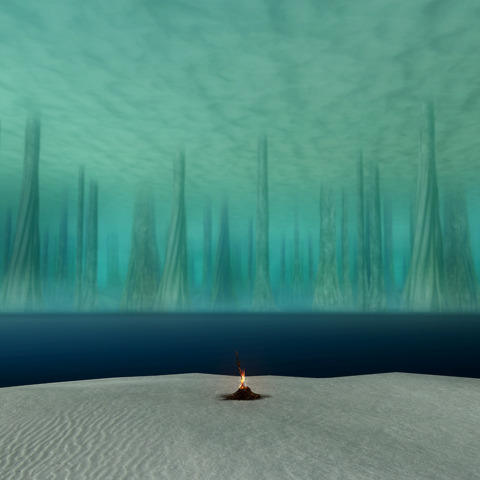

In [5]:
img

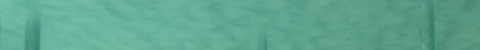

In [7]:
Image.fromarray(arr[100:150])

As a reminder, this is how we can slice our array and then view the corresponding part of the image. We will be changing this portion of the image to different colors.

Like usual, we'll try something that gives an error.

In [8]:
arr[100:150] = 0

ValueError: assignment destination is read-only

What's happening here is that python is telling us that we can't directly edit the image. PIL and NumPy are both very good at storing data without taking up too much space (we'll see this in just a moment). Here, both `arr` and `img` point to the image in memory, they don't actually store the image.

Here is the easy fix for this!

In [9]:
B = arr.copy()

Let's get the size of `img`,`arr`, and `B` to see in more detail what's going on.

In [10]:
import sys

In [11]:
#returns size in bytes
#this is tiny!
sys.getsizeof(img)

48

In [12]:
#slightly bigger than img, 
#but still really small!
sys.getsizeof(arr)

144

In [13]:
sys.getsizeof(B)

691344

The trade-off here is that `B` is much larger, but now is something that we can edit!

Notice the use of broadcasting. Each color channel gets changed to 0.

In [14]:
B[100:150] = 0

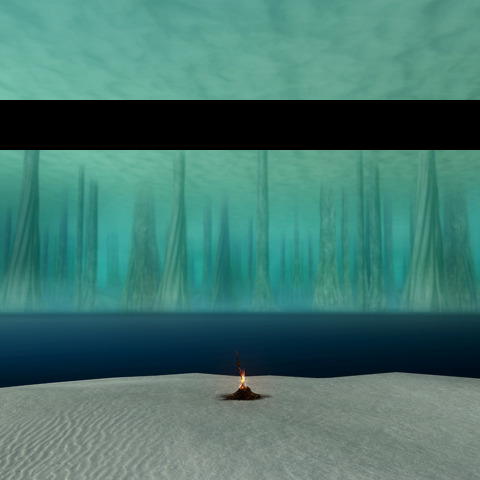

In [15]:
Image.fromarray(B)

Let's try changing this band to white instead.

In [16]:
B[100:150] = 255

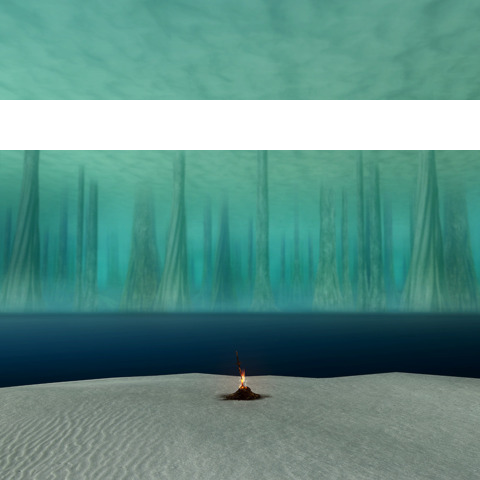

In [17]:
Image.fromarray(B)

What if I wanted to change this horizontal band to a color that wasn't the same in every channel? Let's start by changing to the color in the top left corner.

In [19]:
B[0,0]

array([ 83, 161, 148], dtype=uint8)

In [18]:
B[100:150].shape

(50, 480, 3)

In [20]:
color = np.array([ 83, 161, 148])

In [21]:
color.shape

(3,)

In [22]:
B[100:150] = color

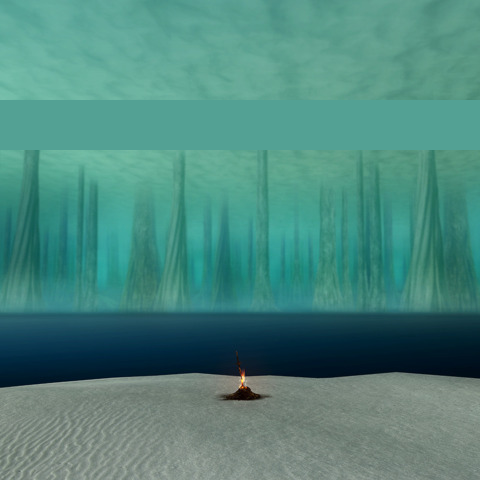

In [23]:
Image.fromarray(B)

Here, we picked another color randomly from [this link](https://coolors.co/).

In [24]:
newcolors = np.array([219, 39, 99])

In [25]:
B[150:200] = newcolors

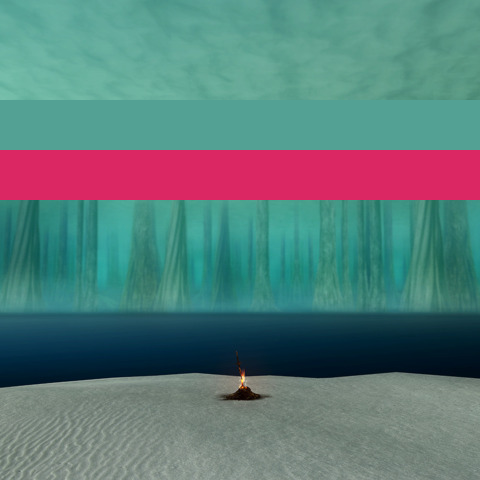

In [26]:
Image.fromarray(B)

## Making an image from scratch

__Idea:__ Start with a NumPy array of RGB values and then turn that into an image. We can pick some colors from the generator :) As usual, we'll start with a small mistake.

In [27]:
#2 pixel by 2 pixel image
arr = np.array([[[64, 249, 155],[157, 105, 163]],[[245, 251, 239],[232, 93, 117]]])

In [28]:
arr.shape

(2, 2, 3)

In [29]:
Image.fromarray(arr)

TypeError: Cannot handle this data type: (1, 1, 3), <i8

Recall from the previous section that the data type of our RGB values were `uint8`. This stands for unsigned (meaning non-negative) 8-bit integers. We use 8-bit integers because there are $256 = 2^8$ possibilities for each color channel.

To fix this, I just specify to use this data type when I create `arr`.

In [52]:
#2 pixel by 2 pixel image
color1 = [64, 249, 155]
color2 = [157, 105, 163]
color3 = [245, 251, 239]
color4 = [232, 93, 117]
arr = np.array([[color1,color2],[color3,color4]],dtype=np.uint8)

In [53]:
Image.fromarray(arr)

Now, this ran without an error, but the resulting image is too small to see! We can fix this by resizing the image.

In [54]:
img = Image.fromarray(arr)

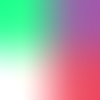

In [55]:
img.resize((100,100))

Here, the image is being blended together. This isn't quite what I wanted. Let's see how to fix this!

In [34]:
help(img.resize)

Help on method resize in module PIL.Image:

resize(size, resample=None, box=None, reducing_gap=None) method of PIL.Image.Image instance
    Returns a resized copy of this image.
    
    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param resample: An optional resampling filter.  This can be
       one of :py:data:`PIL.Image.Resampling.NEAREST`,
       :py:data:`PIL.Image.Resampling.BOX`,
       :py:data:`PIL.Image.Resampling.BILINEAR`,
       :py:data:`PIL.Image.Resampling.HAMMING`,
       :py:data:`PIL.Image.Resampling.BICUBIC` or
       :py:data:`PIL.Image.Resampling.LANCZOS`.
       If the image has mode "1" or "P", it is always set to
       :py:data:`PIL.Image.Resampling.NEAREST`.
       If the image mode specifies a number of bits, such as "I;16", then the
       default filter is :py:data:`PIL.Image.Resampling.NEAREST`.
       Otherwise, the default filter is
       :py:data:`PIL.Image.Resampling.BICUBIC`. See: :ref:`concept-filters`.
   

Let's look at the possible resampling options.

In [35]:
dir(Image.Resampling)

['BICUBIC',
 'BILINEAR',
 'BOX',
 'HAMMING',
 'LANCZOS',
 'NEAREST',
 '__class__',
 '__doc__',
 '__members__',
 '__module__']

We want to ignore the ones starting with `__`, but everything else is a resampling option for us.

In [37]:
for s in dir(Image.Resampling):
    if s[0] != '_':
        print(s)

BICUBIC
BILINEAR
BOX
HAMMING
LANCZOS
NEAREST


For some reason, the number of things that show up on your end may include much, much more than I have. In that case, here is how we should do this portion of the lecture.

In [43]:
for s in dir(Image.Resampling)[:6]:
    print(s)

BICUBIC
BILINEAR
BOX
HAMMING
LANCZOS
NEAREST


What I will do next is view my image with each of these resampling options applied. Like usual, we'll make a mistake first.

In [44]:
for s in dir(Image.Resampling)[:6]:
    print(s)
    display(img.resize((100,100),resample=Image.Resampling.s))

BICUBIC


AttributeError: s

We'll see two different ways to get around this.

In [50]:
getattr(Image.Resampling,"BOX")

<Resampling.BOX: 4>

This `getattr` above is the same as us passing `Image.Resampling.Box`

In [47]:
size_tup = (100,100)

BICUBIC


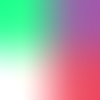

BILINEAR


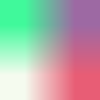

BOX


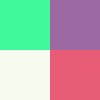

HAMMING


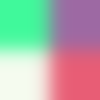

LANCZOS


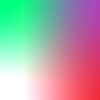

NEAREST


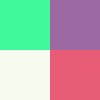

In [49]:
for s in dir(Image.Resampling)[:6]:
    print(s)
    newattr = getattr(Image.Resampling,s)
    display(img.resize(size_tup,resample=newattr))

Here is another, less flexible, method. It gives the same output.

BICUBIC


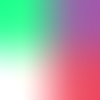

BILINEAR


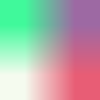

BOX


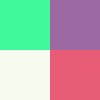

HAMMING


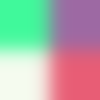

LANCZOS


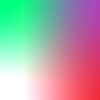

NEAREST


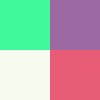

In [51]:
for s in dir(Image.Resampling)[:6]:
    print(s)
    display(img.resize(size_tup,resample=Image.Resampling[s]))

## Swapping color channels

__Goal:__ Use our ash-lake image and swap all of the red channels with the blue channels.

In [56]:
img = Image.open("ash-lake.jpg")
arr = np.asarray(img)

In [57]:
arr

array([[[ 83, 161, 148],
        [ 83, 161, 148],
        [ 83, 161, 148],
        ...,
        [ 94, 157, 140],
        [ 94, 157, 140],
        [ 94, 157, 140]],

       [[ 83, 161, 148],
        [ 83, 161, 148],
        [ 83, 161, 148],
        ...,
        [ 93, 156, 139],
        [ 93, 156, 139],
        [ 93, 156, 139]],

       [[ 83, 161, 148],
        [ 83, 161, 148],
        [ 83, 161, 148],
        ...,
        [ 93, 156, 139],
        [ 92, 155, 138],
        [ 92, 155, 138]],

       ...,

       [[117, 128, 120],
        [140, 151, 143],
        [152, 163, 155],
        ...,
        [113, 126, 119],
        [117, 130, 123],
        [121, 134, 127]],

       [[128, 139, 131],
        [129, 140, 132],
        [124, 135, 127],
        ...,
        [112, 125, 118],
        [114, 127, 120],
        [116, 129, 122]],

       [[130, 141, 133],
        [118, 129, 121],
        [105, 117, 107],
        ...,
        [119, 132, 125],
        [120, 133, 126],
        [121, 134, 127]]

Like usual, we'll start by solving an easier problem. Let's say I wanted to swap Red and Blue for mylist.

In [ ]:
mylist = [83, 161, 148]

The first thing we'll do is try a way that might make sense when you're first learning to program, but will have a mistake.

In [59]:
mylist[0] = mylist[2]
mylist[2] = mylist[0]
mylist

[148, 161, 148]

Notice, what happens is that `mylist[0]` gets changed to `mylist[2]`. By the time we want to change `mylist[2]`, the old value of `mylist[0]` is already gone.

We'll get around this problem by storing the original value of `mylist[0]` is a different variable.

In [60]:
mylist = [83,161,148]
temp = mylist[0]
mylist[0] = mylist[2]
mylist[2] = temp

In [61]:
mylist

[148, 161, 83]

What we'll do now is apply this idea to all of `arr`.

In [62]:
B = arr.copy()
temp = B[:,:,0]
B[:,:,0] = B[:,:,2]
B[:,:,2] = temp

In [63]:
B[0,0]

array([148, 161, 148], dtype=uint8)

Notice, we have the same issue as before! The values didn't get swapped.

Recall: `temp` represents all of the red values in the image. If we check the size, this seems way too small.

In [64]:
sys.getsizeof(temp)

128

`temp` is not actually storing `B[:,:,0]`, it's pointing to it in memory. Thus, when `B[:,:,0]` gets changed, `temp` gets changed as well.

Here's how I could actually get what I want:

In [65]:
B = arr.copy()
temp = B[:,:,0].copy()
B[:,:,0] = B[:,:,2]
B[:,:,2] = temp

In [66]:
B[0,0]

array([148, 161,  83], dtype=uint8)

Recall, I cannot change `arr` unless I make a copy. We can use this to our advantage here.

In [67]:
B = arr.copy()
B[:,:,0] = arr[:,:,2]
B[:,:,2] = arr[:,:,0]

In [68]:
B[0,0]

array([148, 161,  83], dtype=uint8)

Let's see what the image looks like! First, the original.

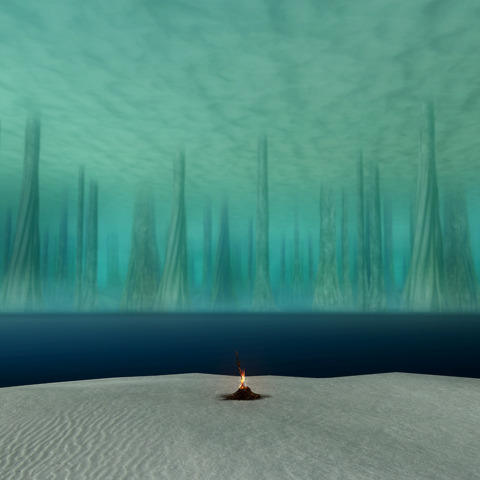

In [70]:
img

Now, Red swapped with Blue.

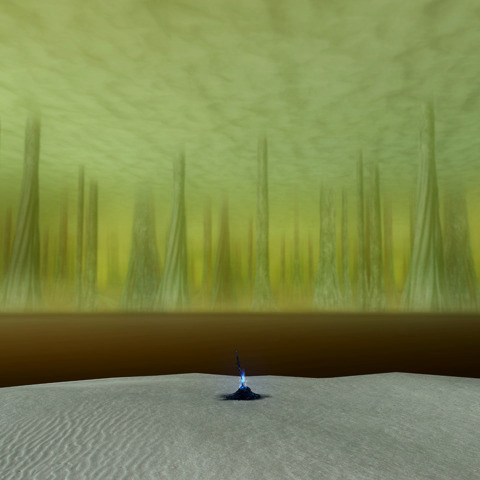

In [69]:
Image.fromarray(B)

For fun, let's swap Red with Green.

In [71]:
C = arr.copy()
C[:,:,0] = arr[:,:,1]
C[:,:,1] = arr[:,:,0]

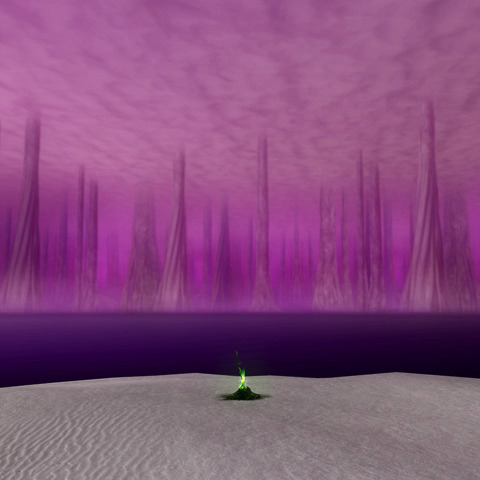

In [72]:
Image.fromarray(C)

Vaporwave Ash Lake.

## Unique colors

__Goal:__ Figure out how many unique colors are in this image. Then figure out the indices where the colors change.

In [76]:
img = Image.open("images/barbie-grid.png")
arr = np.asarray(img)

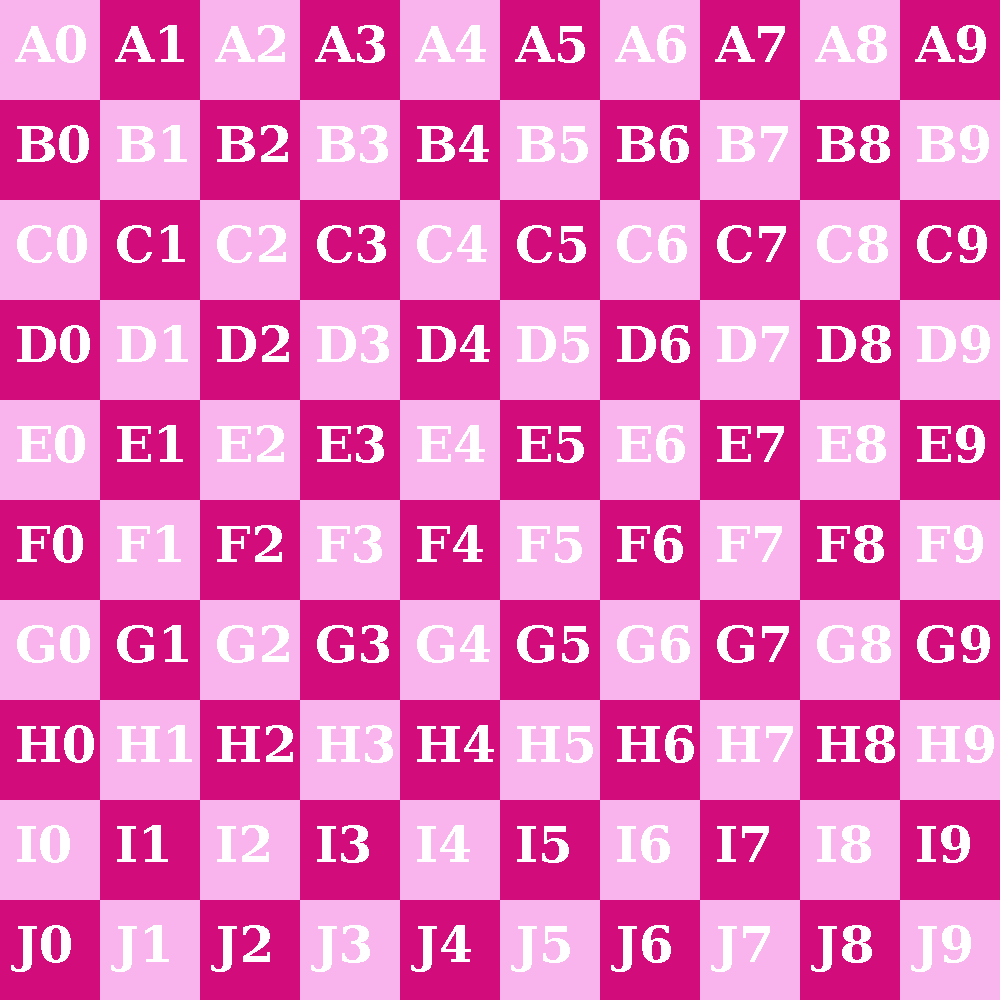

In [74]:
img

Just looking at this image, you would guess that there are three colors. You would be correct in this case, but that is because I worked very hard to make it that way. Notice how jagged the text is. This is due to something called aliasing. If I want to remove the jagged edges, I can use something called anti-aliasing. What this does is instead of keeping the exact pixel values, it shifts them just a little bit to make the color transitions more smooth. (Think of the resampling that we did in the previous portion of lecture.)

How many unique colors are there?

In [77]:
arr.shape

(1000, 1000, 3)

In [79]:
np.unique(arr)

array([ 12, 123, 180, 211, 237, 249, 255], dtype=uint8)

If I just call `np.unique(arr)`, it looks at a flattened `arr` and sees all of the numbers that appear. It then picks each unique number.

However, for this question, I'm more interested in how many unique RGB triples there are.

In [80]:
B = arr.reshape(-1,3)

Notice, each row of B represents an RGB triple that shows up in the image.

In [81]:
B

array([[249, 180, 237],
       [249, 180, 237],
       [249, 180, 237],
       ...,
       [249, 180, 237],
       [249, 180, 237],
       [249, 180, 237]], dtype=uint8)

In [82]:
B.shape

(1000000, 3)

Notice if I call `np.unique(B)`, I'm still getting the same issue from before. 

In [83]:
np.unique(B)

array([ 12, 123, 180, 211, 237, 249, 255], dtype=uint8)

This gives the unique RGB triples that show up in the image.

In [88]:
np.unique(B,axis=0)

array([[211,  12, 123],
       [249, 180, 237],
       [255, 255, 255]], dtype=uint8)